# <u>Importing and Cleaning Data<u>

### Objective:

In this notebook, NFL lines, spreads and outcomes will be imported from csv data files. The dataframes will be explored and null/missing values will be handle to prepare the data for EDA.

### Importing External Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from data_preprocessing import *
import matplotlib.pyplot as plt
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
from datetime import datetime
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Importing NFL Data Files

In [2]:
odds = pd.read_csv('../Data/spread_and_odds/Data-Table 1.csv')
spread = pd.read_csv('../Data/spread_and_odds/nfl_games 2.csv')

### Displaying Data

In [3]:
odds.head()

,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home Odds Open,Home Odds Min,...,Total Score Close,Total Score Over Open,Total Score Over Min,Total Score Over Max,Total Score Over Close,Total Score Under Open,Total Score Under Min,Total Score Under Max,Total Score Under Close,Notes
0,2018-02-04,New England Patriots,Philadelphia Eagles,33,41,NaN,Y,Y,1.43,1.43,...,48.5,2.00,2.00,1.98,1.93,1.91,1.91,2.05,1.97,NaN
1,2018-01-21,Philadelphia Eagles,Minnesota Vikings,38,7,NaN,Y,NaN,2.53,2.31,...,39.0,1.95,1.87,2.01,1.96,1.95,1.95,2.00,1.94,NaN
2,2018-01-21,New England Patriots,Jacksonville Jaguars,24,20,NaN,Y,NaN,1.25,1.25,...,46.0,2.00,1.87,2.00,2.02,1.91,1.90,1.91,1.88,NaN
3,2018-01-14,Minnesota Vikings,New Orleans Saints,29,24,NaN,Y,NaN,1.53,1.42,...,46.5,1.95,1.95,2.02,1.93,1.95,1.95,1.93,1.98,NaN
4,2018-01-14,Pittsburgh Steelers,Jacksonville Jaguars,42,45,NaN,Y,NaN,1.32,1.30,...,40.5,2.03,1.90,2.03,1.93,1.88,1.95,1.95,1.97,NaN


In [4]:
odds.tail()

,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home Odds Open,Home Odds Min,...,Total Score Close,Total Score Over Open,Total Score Over Min,Total Score Over Max,Total Score Over Close,Total Score Under Open,Total Score Under Min,Total Score Under Max,Total Score Under Close,Notes
3199,2006-09-10,Detroit Lions,Seattle Seahawks,6,9,NaN,NaN,NaN,3.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3200,2006-09-10,Cleveland Browns,New Orleans Saints,14,19,NaN,NaN,NaN,1.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3201,2006-09-10,Carolina Panthers,Atlanta Falcons,6,20,NaN,NaN,NaN,1.43,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3202,2006-09-10,Arizona Cardinals,San Francisco 49ers,34,27,NaN,NaN,NaN,1.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3203,2006-09-07,Pittsburgh Steelers,Miami Dolphins,28,17,NaN,NaN,NaN,1.80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
spread.head()

,Date,Season year,Week,Home Team,Away Team,Stadium,Team Favorite,Spread,Over/Under,Stadium Type,Weather Temperature,Weather Wind Mph,Weather Humidity,Score Home,Score Away
0,09/07/2006,2006,1,Pittsburgh Steelers,Miami Dolphins,Heinz Field,PIT,-1.5,34.5,NaN,62.0,3.0,75.0,28,17
1,09/10/2006,2006,1,Arizona Cardinals,San Francisco 49ers,University of Phoenix Stadium,ARI,-9.5,44.0,DOME,72.0,0.0,NaN,34,27
2,09/10/2006,2006,1,Carolina Panthers,Atlanta Falcons,Bank of America Stadium,CAR,-4.5,39.0,NaN,73.0,6.0,76.0,6,20
3,09/10/2006,2006,1,Cleveland Browns,New Orleans Saints,FirstEnergy Stadium,CLE,-3.0,36.0,NaN,65.0,13.0,74.0,14,19
4,09/10/2006,2006,1,Detroit Lions,Seattle Seahawks,Ford Field,SEA,-6.0,44.0,DOME,72.0,0.0,NaN,6,9


In [6]:
spread.tail()

,Date,Season year,Week,Home Team,Away Team,Stadium,Team Favorite,Spread,Over/Under,Stadium Type,Weather Temperature,Weather Wind Mph,Weather Humidity,Score Home,Score Away
3199,01/14/2018,2017,Division,Minnesota Vikings,New Orleans Saints,U.S. Bank Stadium,MIN,-5.5,46.5,DOME,72.0,0.0,NaN,29,24
3200,01/14/2018,2017,Division,Pittsburgh Steelers,Jacksonville Jaguars,Heinz Field,PIT,-7.0,40.5,NaN,18.0,2.0,NaN,42,45
3201,01/21/2018,2017,Conference,New England Patriots,Jacksonville Jaguars,Gillette Stadium,NE,-7.5,46.0,NaN,48.0,2.0,NaN,24,20
3202,01/21/2018,2017,Conference,Philadelphia Eagles,Minnesota Vikings,Lincoln Financial Field,MIN,-3.0,39.0,NaN,46.0,1.0,NaN,38,7
3203,02/04/2018,2017,Superbowl,New England Patriots,Philadelphia Eagles,U.S. Bank Stadium,NE,-4.5,48.5,DOME,72.0,0.0,NaN,33,41


In [7]:
spread.shape

(3204, 15)

In [8]:
odds.shape

(3204, 45)

In [9]:
odds.columns

Index(['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score',
       'Overtime?', 'Playoff Game?', 'Neutral Venue?', 'Home Odds Open',
       'Home Odds Min', 'Home Odds Max', 'Home Odds Close', 'Away Odds Open',
       'Away Odds Min', 'Away Odds Max', 'Away Odds Close', 'Home Line Open',
       'Home Line Min', 'Home Line Max', 'Home Line Close', 'Away Line Open',
       'Away Line Min', 'Away Line Max', 'Away Line Close',
       'Home Line Odds Open', 'Home Line Odds Min', 'Home Line Odds Max',
       'Home Line Odds Close', 'Away Line Odds Open', 'Away Line Odds Min',
       'Away Line Odds Max', 'Away Line Odds Close', 'Total Score Open',
       'Total Score Min', 'Total Score Max', 'Total Score Close',
       'Total Score Over Open', 'Total Score Over Min', 'Total Score Over Max',
       'Total Score Over Close', 'Total Score Under Open',
       'Total Score Under Min', 'Total Score Under Max',
       'Total Score Under Close', 'Notes'],
      dtype='object')

In [10]:
spread.columns

Index(['Date', 'Season year', 'Week', 'Home Team', 'Away Team', 'Stadium',
       'Team Favorite', 'Spread', 'Over/Under', 'Stadium Type',
       'Weather Temperature', 'Weather Wind Mph', 'Weather Humidity',
       'Score Home', 'Score Away'],
      dtype='object')

### Initial description of the Data

- The data shows NFL games outcomes and a variety of betting lines(odds, over/under, spread) from 09/07/2006 to 02/04/2018.
- Noticing many null and missing values that will need to be lookede at in my detail

### Inspecting the data to find missing and obscure values

In [11]:
# inspecting types of data
odds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 45 columns):
Date                       3204 non-null object
Home Team                  3204 non-null object
Away Team                  3204 non-null object
Home Score                 3204 non-null int64
Away Score                 3204 non-null int64
Overtime?                  190 non-null object
Playoff Game?              132 non-null object
Neutral Venue?             35 non-null object
Home Odds Open             3204 non-null float64
Home Odds Min              1068 non-null float64
Home Odds Max              1068 non-null float64
Home Odds Close            1068 non-null float64
Away Odds Open             3204 non-null float64
Away Odds Min              1068 non-null float64
Away Odds Max              1068 non-null float64
Away Odds Close            1068 non-null float64
Home Line Open             3204 non-null float64
Home Line Min              1068 non-null float64
Home Line Max            

In [12]:
odds.isnull().sum()

Date                          0
Home Team                     0
Away Team                     0
Home Score                    0
Away Score                    0
Overtime?                  3014
Playoff Game?              3072
Neutral Venue?             3169
Home Odds Open                0
Home Odds Min              2136
Home Odds Max              2136
Home Odds Close            2136
Away Odds Open                0
Away Odds Min              2136
Away Odds Max              2136
Away Odds Close            2136
Home Line Open                0
Home Line Min              2136
Home Line Max              2136
Home Line Close            2136
Away Line Open             2136
Away Line Min              2136
Away Line Max              2136
Away Line Close            2136
Home Line Odds Open        2136
Home Line Odds Min         2136
Home Line Odds Max         2136
Home Line Odds Close       2136
Away Line Odds Open        2136
Away Line Odds Min         2136
Away Line Odds Max         2136
Away Lin

In [13]:
spread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 15 columns):
Date                   3204 non-null object
Season year            3204 non-null int64
Week                   3204 non-null object
Home Team              3204 non-null object
Away Team              3204 non-null object
Stadium                3122 non-null object
Team Favorite          3204 non-null object
Spread                 3204 non-null float64
Over/Under             3204 non-null float64
Stadium Type           910 non-null object
Weather Temperature    3122 non-null float64
Weather Wind Mph       3122 non-null float64
Weather Humidity       1426 non-null float64
Score Home             3204 non-null int64
Score Away             3204 non-null int64
dtypes: float64(5), int64(3), object(7)
memory usage: 375.5+ KB


In [14]:
spread.isnull().sum()

Date                      0
Season year               0
Week                      0
Home Team                 0
Away Team                 0
Stadium                  82
Team Favorite             0
Spread                    0
Over/Under                0
Stadium Type           2294
Weather Temperature      82
Weather Wind Mph         82
Weather Humidity       1778
Score Home                0
Score Away                0
dtype: int64

### Dropping columns from the odds dataframe
   - So there is no duplicate columns when merging dataframes
   - Also dropping non-useful columns
    

In [15]:
odds = odds.drop(columns=['Notes', 'Neutral Venue?'])

In [16]:
odds = odds.drop(columns=['Away Score', 'Home Score'])

In [17]:
odds.shape

(3204, 41)

### Filling null values for numerical columns 
- Using functions from data preprocessing text file

In [18]:
impute_missing_values(odds, 'mean')

In [19]:
# impute_missing_values(spread, 'mean')

In [20]:
odds.isnull().sum()

Date                          0
Home Team                     0
Away Team                     0
Overtime?                  3014
Playoff Game?              3072
Home Odds Open                0
Home Odds Min                 0
Home Odds Max                 0
Home Odds Close               0
Away Odds Open                0
Away Odds Min                 0
Away Odds Max                 0
Away Odds Close               0
Home Line Open                0
Home Line Min                 0
Home Line Max                 0
Home Line Close               0
Away Line Open                0
Away Line Min                 0
Away Line Max                 0
Away Line Close               0
Home Line Odds Open           0
Home Line Odds Min            0
Home Line Odds Max            0
Home Line Odds Close          0
Away Line Odds Open           0
Away Line Odds Min            0
Away Line Odds Max            0
Away Line Odds Close          0
Total Score Open              0
Total Score Min               0
Total Sc

###  Filling missing values with string null values
- Grabbing all categorical features

In [21]:
cat_features = odds.select_dtypes(include = 'object').columns
cat_features

for category in cat_features:
    odds[category].fillna('na', inplace = True)
    

In [22]:
cat_features = spread.select_dtypes(include = 'object').columns
cat_features

for category in cat_features:
    spread[category].fillna('na', inplace = True)

### Converting all columns to lowercase and replacing spaces with underscores in columns.

In [23]:
odds.columns = [i.lower().replace(' ', '_') for i in odds.columns]

In [24]:
spread.columns = [i.lower().replace(' ', '_') for i in spread.columns]

### Converting date column into time series

In [25]:
spread['date'] = pd.to_datetime(spread['date'])

In [26]:
odds['date'] = pd.to_datetime(odds['date'])

### Sorting dataframe by date and home team

In [27]:
# Inspecting shape
spread.shape

(3204, 15)

In [28]:
# Inspecting shape
odds.shape

(3204, 41)

In [29]:
spread.dtypes

date                   datetime64[ns]
season_year                     int64
week                           object
home_team                      object
away_team                      object
stadium                        object
team_favorite                  object
spread                        float64
over/under                    float64
stadium_type                   object
weather_temperature           float64
weather_wind_mph              float64
weather_humidity              float64
score_home                      int64
score_away                      int64
dtype: object

In [30]:
spread.sort_values(by=['date', 'home_team'], inplace=True, ascending=True)

In [31]:
odds.sort_values(by=['date', 'home_team'], inplace=True, ascending=True)

### Reset indices on each data frame

In [32]:
spread.reset_index(drop=True, inplace=True)
odds.reset_index(drop=True, inplace=True)

In [33]:
spread.head()

,date,season_year,week,home_team,away_team,stadium,team_favorite,spread,over/under,stadium_type,weather_temperature,weather_wind_mph,weather_humidity,score_home,score_away
0,2006-09-07,2006,1,Pittsburgh Steelers,Miami Dolphins,Heinz Field,PIT,-1.5,34.5,na,62.0,3.0,75.0,28,17
1,2006-09-10,2006,1,Arizona Cardinals,San Francisco 49ers,University of Phoenix Stadium,ARI,-9.5,44.0,DOME,72.0,0.0,NaN,34,27
2,2006-09-10,2006,1,Carolina Panthers,Atlanta Falcons,Bank of America Stadium,CAR,-4.5,39.0,na,73.0,6.0,76.0,6,20
3,2006-09-10,2006,1,Cleveland Browns,New Orleans Saints,FirstEnergy Stadium,CLE,-3.0,36.0,na,65.0,13.0,74.0,14,19
4,2006-09-10,2006,1,Detroit Lions,Seattle Seahawks,Ford Field,SEA,-6.0,44.0,DOME,72.0,0.0,NaN,6,9


In [34]:
odds.head()

,date,home_team,away_team,overtime?,playoff_game?,home_odds_open,home_odds_min,home_odds_max,home_odds_close,away_odds_open,...,total_score_max,total_score_close,total_score_over_open,total_score_over_min,total_score_over_max,total_score_over_close,total_score_under_open,total_score_under_min,total_score_under_max,total_score_under_close
0,2006-09-07,Pittsburgh Steelers,Miami Dolphins,na,na,1.80,1.813155,2.038792,1.924897,2.05,...,46.068352,45.213015,1.953567,1.907416,1.997706,1.950843,1.948511,1.936685,1.963408,1.95441
1,2006-09-10,Arizona Cardinals,San Francisco 49ers,na,na,1.18,1.813155,2.038792,1.924897,5.00,...,46.068352,45.213015,1.953567,1.907416,1.997706,1.950843,1.948511,1.936685,1.963408,1.95441
2,2006-09-10,Carolina Panthers,Atlanta Falcons,na,na,1.43,1.813155,2.038792,1.924897,2.90,...,46.068352,45.213015,1.953567,1.907416,1.997706,1.950843,1.948511,1.936685,1.963408,1.95441
3,2006-09-10,Cleveland Browns,New Orleans Saints,na,na,1.50,1.813155,2.038792,1.924897,2.75,...,46.068352,45.213015,1.953567,1.907416,1.997706,1.950843,1.948511,1.936685,1.963408,1.95441
4,2006-09-10,Detroit Lions,Seattle Seahawks,na,na,3.50,1.813155,2.038792,1.924897,1.33,...,46.068352,45.213015,1.953567,1.907416,1.997706,1.950843,1.948511,1.936685,1.963408,1.95441


### Merging DataFrames on index

In [35]:
betting_df = pd.merge(spread, odds, how='outer' ,left_index=True, right_index=True)
betting_df.columns

Index(['date_x', 'season_year', 'week', 'home_team_x', 'away_team_x',
       'stadium', 'team_favorite', 'spread', 'over/under', 'stadium_type',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity',
       'score_home', 'score_away', 'date_y', 'home_team_y', 'away_team_y',
       'overtime?', 'playoff_game?', 'home_odds_open', 'home_odds_min',
       'home_odds_max', 'home_odds_close', 'away_odds_open', 'away_odds_min',
       'away_odds_max', 'away_odds_close', 'home_line_open', 'home_line_min',
       'home_line_max', 'home_line_close', 'away_line_open', 'away_line_min',
       'away_line_max', 'away_line_close', 'home_line_odds_open',
       'home_line_odds_min', 'home_line_odds_max', 'home_line_odds_close',
       'away_line_odds_open', 'away_line_odds_min', 'away_line_odds_max',
       'away_line_odds_close', 'total_score_open', 'total_score_min',
       'total_score_max', 'total_score_close', 'total_score_over_open',
       'total_score_over_min', 'total_score_ove

### Dropping duplicate columns and renaming duplicates

In [36]:
betting_df = betting_df.drop(columns=['home_team_y', 'away_team_y', 'date_y'])

In [37]:
betting_df.rename(index=str, columns={"home_team_x": "home_team", "away_team_x": "away_team", "date_x": "date"}, inplace=True)
betting_df.columns

Index(['date', 'season_year', 'week', 'home_team', 'away_team', 'stadium',
       'team_favorite', 'spread', 'over/under', 'stadium_type',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity',
       'score_home', 'score_away', 'overtime?', 'playoff_game?',
       'home_odds_open', 'home_odds_min', 'home_odds_max', 'home_odds_close',
       'away_odds_open', 'away_odds_min', 'away_odds_max', 'away_odds_close',
       'home_line_open', 'home_line_min', 'home_line_max', 'home_line_close',
       'away_line_open', 'away_line_min', 'away_line_max', 'away_line_close',
       'home_line_odds_open', 'home_line_odds_min', 'home_line_odds_max',
       'home_line_odds_close', 'away_line_odds_open', 'away_line_odds_min',
       'away_line_odds_max', 'away_line_odds_close', 'total_score_open',
       'total_score_min', 'total_score_max', 'total_score_close',
       'total_score_over_open', 'total_score_over_min', 'total_score_over_max',
       'total_score_over_close', 'total_score

In [38]:
betting_df.shape

(3204, 53)

### Dropping rows from the 2006 to 2013 season 
- Too many null values and will still have 5 seasons(years) of data to use

In [39]:
betting_df = betting_df[2136:]

### Turning all weeks column into integers
 - playoffs are listed as an object

In [40]:
# 2 different spellings
betting_df.loc[(betting_df.week == 'Wildcard'), 'week'] = 18
betting_df.loc[(betting_df.week == 'WildCard'), 'week'] = 18

#### Checking changes, then will proceed with other playoff rounds

In [41]:
betting_df.tail(11)

,date,season_year,week,home_team,away_team,stadium,team_favorite,spread,over/under,stadium_type,...,total_score_max,total_score_close,total_score_over_open,total_score_over_min,total_score_over_max,total_score_over_close,total_score_under_open,total_score_under_min,total_score_under_max,total_score_under_close
3193,2018-01-06,2017,18,Kansas City Chiefs,Tennessee Titans,Arrowhead Stadium,KC,-8.5,44.0,na,...,45.5,44.0,1.95,1.91,1.95,1.91,1.95,1.93,1.95,2.00
3194,2018-01-06,2017,18,Los Angeles Rams,Atlanta Falcons,Los Angeles Memorial Coliseum,LAR,-6.5,48.0,na,...,50.5,48.0,1.95,1.91,1.95,1.95,1.95,1.93,1.95,1.95
3195,2018-01-07,2017,18,Jacksonville Jaguars,Buffalo Bills,EverBank Field,JAX,-8.0,39.5,na,...,40.0,39.5,2.00,1.86,2.07,1.91,1.91,1.91,1.91,2.00
3196,2018-01-07,2017,18,New Orleans Saints,Carolina Panthers,Mercedes-Benz Superdome,NO,-6.5,47.5,DOME,...,48.5,47.5,1.95,1.94,2.01,1.98,1.95,1.96,1.95,1.93
3197,2018-01-13,2017,Division,New England Patriots,Tennessee Titans,Gillette Stadium,NE,-13.5,48.5,na,...,48.5,48.0,1.95,1.87,2.02,1.94,1.95,1.93,1.93,1.96
3198,2018-01-13,2017,Division,Philadelphia Eagles,Atlanta Falcons,Lincoln Financial Field,ATL,-2.5,40.0,na,...,43.5,40.0,1.98,1.88,1.98,1.89,1.93,1.97,1.93,2.02
3199,2018-01-14,2017,Division,Minnesota Vikings,New Orleans Saints,U.S. Bank Stadium,MIN,-5.5,46.5,DOME,...,47.0,46.5,1.95,1.95,2.02,1.93,1.95,1.95,1.93,1.98
3200,2018-01-14,2017,Division,Pittsburgh Steelers,Jacksonville Jaguars,Heinz Field,PIT,-7.0,40.5,na,...,41.5,40.5,2.03,1.90,2.03,1.93,1.88,1.95,1.95,1.97
3201,2018-01-21,2017,Conference,New England Patriots,Jacksonville Jaguars,Gillette Stadium,NE,-7.5,46.0,na,...,47.0,46.0,2.00,1.87,2.00,2.02,1.91,1.90,1.91,1.88
3202,2018-01-21,2017,Conference,Philadelphia Eagles,Minnesota Vikings,Lincoln Financial Field,MIN,-3.0,39.0,na,...,39.0,39.0,1.95,1.87,2.01,1.96,1.95,1.95,2.00,1.94


In [42]:
betting_df.loc[(betting_df.week == 'Division'), 'week'] = 19
betting_df.loc[(betting_df.week == 'Conference'), 'week'] = 20
betting_df.loc[(betting_df.week == 'Superbowl'), 'week'] = 21
betting_df.loc[(betting_df.week == 'SuperBowl'), 'week'] = 21

In [43]:
# Converting to integers
betting_df['week']= betting_df['week'].astype("int64")

### Creating a total points and a  score difference column 
- Will be used to see if the points total went over or under the expected outcome

In [44]:
betting_df['score_difference'] = betting_df['score_home'] - betting_df['score_away']
betting_df['total_points'] = betting_df['score_home'] + betting_df['score_away']

### Plotting Histograms for Numerical Data

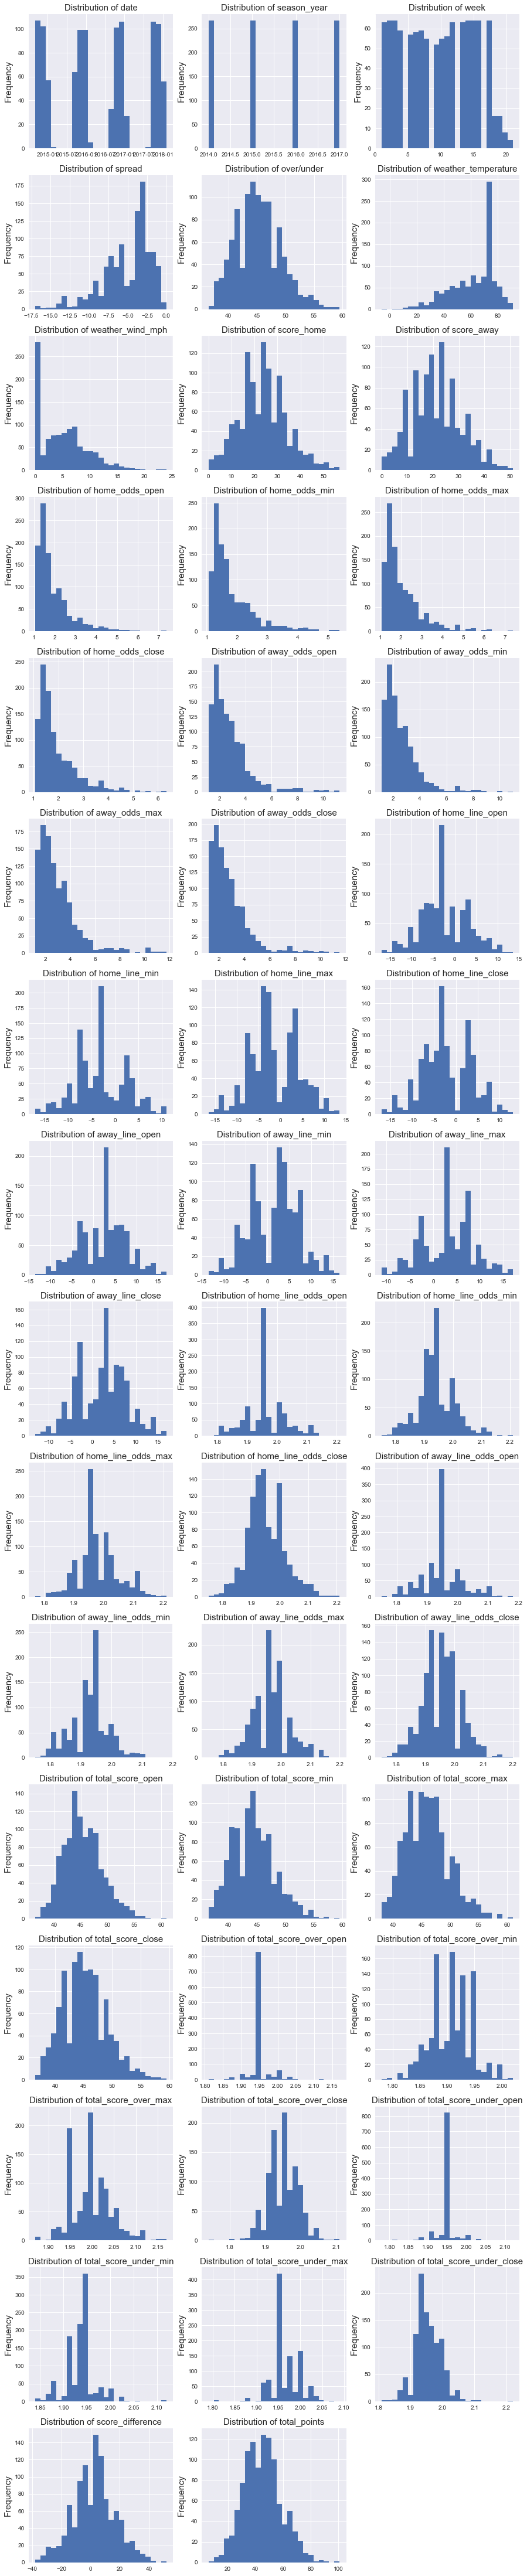

In [45]:
features = betting_df.select_dtypes(exclude='object').columns
features = [col for col in features if col not in ['weather_humidity']]
subplot_hist(betting_df, features);

### Displaying the summary statistics for every numeric variable within my final dataframe. 

In [46]:
betting_df.describe().T

,count,mean,std,min,25%,50%,75%,max
season_year,1068.0,2015.500000,1.118558,2014.00,2014.750,2015.500,2016.2500,2017.00
week,1068.0,9.473783,5.290286,1.00,5.000,10.000,14.0000,21.00
spread,1068.0,-5.057584,3.152439,-17.00,-7.000,-4.000,-3.0000,0.00
over/under,1068.0,45.303371,3.943035,36.50,42.500,45.000,48.0000,59.50
weather_temperature,1068.0,61.555243,16.280339,-6.00,51.750,67.000,72.0000,91.00
weather_wind_mph,1068.0,4.926030,4.455881,0.00,0.000,4.000,7.0000,24.00
weather_humidity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score_home,1068.0,23.722846,10.286248,0.00,17.000,24.000,30.0000,57.00
score_away,1068.0,21.301498,9.552053,0.00,14.000,20.000,27.0000,51.00
home_odds_open,1068.0,1.919167,0.806492,1.07,1.370,1.640,2.2200,7.38


### Takeaways:
 - Looking into what features have a more normal distribution to help gain insights on what might best be used to predict the outcome of a game.
 - Features with one straight line will not be a good predictor becuase it all falls into one bin and will not help differentiate between the games outcome.
 - Still hard to tell at this point will need to perform additional EDA to try and gain more insights on the data.

## Saving Data

In [47]:
betting_df.to_csv('../Data/betting_df.csv', index=False)